In [ ]:
%pip install -qq diffusers datasets accelerate wandb open-clip-torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from datasets import load_dataset
from diffusers import DDIMScheduler, DDPMPipeline
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm

In [ ]:
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

In [ ]:
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to(device);

/opt/conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
!wandb login c8158c7f409290d812660cf23ccfce71c858f46a

wandb: Appending key for api.wandb.ai to your netrc file: /home/pranav24/.netrc


In [ ]:
!pip install fastcore

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [ ]:
!python finetune_model.py --image_size 128 --batch_size 8 --num_epochs 3\
     --grad_accumulation_steps 2 --start_model "cartoonface_ddpmstep_500"\
     --dataset_name "Skiittoo/cartoon-faces" --wandb_project 'cartoonddpmfacenew-2'\
     --log_samples_every 10 --save_model_every 500 --model_save_name 'cartoonface_ddpm_2'

wandb: Currently logged in as: dlcvsp24 (dlcv24). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.0
wandb: Run data is saved locally in /home/pranav24/project_dlcv/wandb/run-20240509_025716-5t37wyqq
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run eager-deluge-3
wandb: ⭐️ View project at https://wandb.ai/dlcv24/cartoonddpmfacenew-2
wandb: 🚀 View run at https://wandb.ai/dlcv24/cartoonddpmfacenew-2/runs/5t37wyqq
Loading pipeline components...: 100%|█████████████| 2/2 [00:00<00:00, 31.22it/s]
/opt/conda/lib/python3.11/site-packages/diffusers/configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config

In [ ]:
!python finetune_model.py --image_size 128 --batch_size 8 --num_epochs 3\
     --grad_accumulation_steps 2 --start_model "cartoonface_ddpm_2"\
     --dataset_name "Skiittoo/cartoon-faces" --wandb_project 'cartoonddpmfacenew-3'\
     --log_samples_every 10 --save_model_every 500 --model_save_name 'cartoonface_ddpm-3'

wandb: Currently logged in as: dlcvsp24 (dlcv24). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.0
wandb: Run data is saved locally in /home/pranav24/project_dlcv/wandb/run-20240509_055453-ozpfn7b4
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run smooth-sponge-1
wandb: ⭐️ View project at https://wandb.ai/dlcv24/cartoonddpmfacenew-3
wandb: 🚀 View run at https://wandb.ai/dlcv24/cartoonddpmfacenew-3/runs/ozpfn7b4
Loading pipeline components...: 100%|█████████████| 2/2 [00:00<00:00, 26.58it/s]
/opt/conda/lib/python3.11/site-packages/diffusers/configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("confi

In [ ]:
!python finetune_model.py --image_size 128 --batch_size 8 --num_epochs 3\
     --grad_accumulation_steps 2 --start_model "google/ddpm-celebahq-256"\
     --dataset_name "Skiittoo/cartoon-faces" --wandb_project 'cartoonddpmfacenew-refined'\
     --log_samples_every 100 --save_model_every 500 --model_save_name 'cartoonface_ddpm_refine'

wandb: Currently logged in as: dlcvsp24 (dlcv24). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.0
wandb: Run data is saved locally in /home/pranav24/project_dlcv/wandb/run-20240509_225114-8inmyhox
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run polar-morning-3
wandb: ⭐️ View project at https://wandb.ai/dlcv24/cartoonddpmfacenew-refined
wandb: 🚀 View run at https://wandb.ai/dlcv24/cartoonddpmfacenew-refined/runs/8inmyhox
/opt/conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|█████████████| 2/2 [00:00<00:00,  6.36it/s]
/opt/conda/lib/python3.11/site-packages/diffusers/configuration_utils.py:244: FutureWarning: It is depr

In [ ]:
from huggingface_hub import HfApi, ModelCard, create_repo, get_full_repo_name

model_name = "dlcvproj/ddpm-celebahq-finetuned-cartoonfaces"
local_folder_name = "cartoonface_ddpm_refinestep_500"
hub_model_id = get_full_repo_name(model_name)
create_repo(hub_model_id)
api = HfApi()
api.upload_folder(
    folder_path=f"{local_folder_name}/scheduler", path_in_repo="", repo_id=hub_model_id
)
api.upload_folder(
    folder_path=f"{local_folder_name}/unet", path_in_repo="", repo_id=hub_model_id
)
api.upload_file(
    path_or_fileobj=f"{local_folder_name}/model_index.json",
    path_in_repo="model_index.json",
    repo_id=hub_model_id,
)

content =""

card = ModelCard(content)
card.push_to_hub(hub_model_id)

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


CommitInfo(commit_url='https://huggingface.co/dlcvproj/ddpm-celebahq-finetuned-cartoonfaces-final-ckpt-1750/commit/004970042570cc7ff98893f753db4ba21e8680c3', commit_message='Upload README.md with huggingface_hub', commit_description='', oid='004970042570cc7ff98893f753db4ba21e8680c3', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
!python finetune_model.py --image_size 128 --batch_size 8 --num_epochs 3\
     --grad_accumulation_steps 2 --start_model "cartoonface_ddpm_refinestep_1000"\
     --dataset_name "Skiittoo/cartoon-faces" --wandb_project 'cartoonddpmfacenew-refine-2'\
     --log_samples_every 50 --save_model_every 500 --model_save_name 'cartoonface_ddpm_new_Rf'

wandb: Currently logged in as: dlcvsp24 (dlcv24). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.0
wandb: Run data is saved locally in /home/pranav24/project_dlcv/wandb/run-20240510_010022-2ggbk0h3
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run expert-plasma-1
wandb: ⭐️ View project at https://wandb.ai/dlcv24/cartoonddpmfacenew-refine-2
wandb: 🚀 View run at https://wandb.ai/dlcv24/cartoonddpmfacenew-refine-2/runs/2ggbk0h3
Loading pipeline components...: 100%|█████████████| 2/2 [00:00<00:00, 23.84it/s]
/opt/conda/lib/python3.11/site-packages/diffusers/configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  de

Next, you can follow the same steps outlined in Unit 1's [Introduction to Diffusers](https://github.com/huggingface/diffusion-models-class/blob/main/unit1/01_introduction_to_diffusers.ipynb) to push the model to the Hub for later use:

In [ ]:
from diffusers import DDPMPipeline

pipeline = DDPMPipeline.from_pretrained('ddpm-celebahq-finetuned-cartoonfaces-final')


/opt/conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

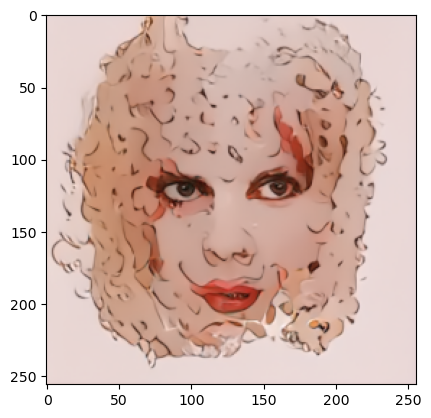

In [ ]:
from diffusers import DDPMPipeline
pipeline = DDPMPipeline.from_pretrained('dlcvproj/ddpm-celebahq-finetuned-cartoonfaces-final-ckpt-1750').to('cuda')
lst=[]
for i in range(0,10):
    image = pipeline().images[0]
    plt.imshow(image)
    lst.append(image)



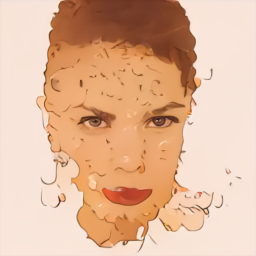

In [ ]:
lst[0]

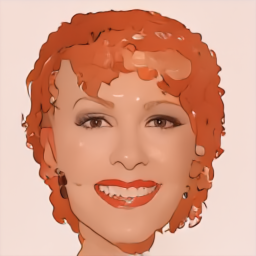

In [ ]:
lst[1]

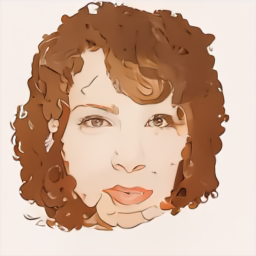

In [ ]:
lst[2]

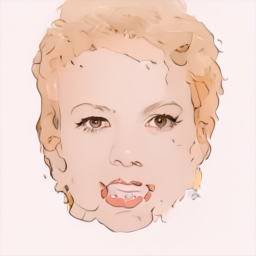

In [ ]:
lst[3]

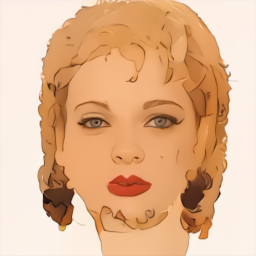

In [ ]:
lst[4]

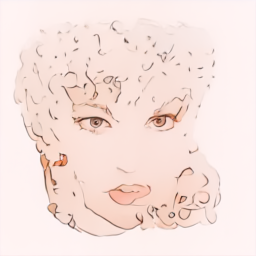

In [ ]:
lst[5]

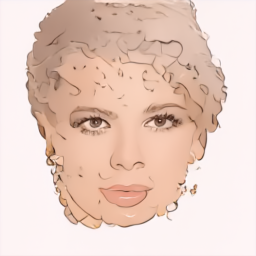

In [ ]:
lst[6]

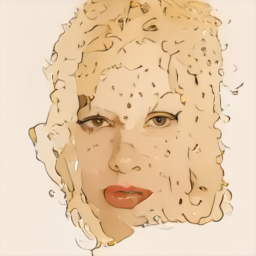

In [ ]:
lst[7]

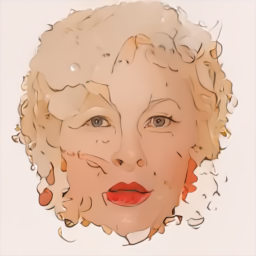

In [ ]:
lst[8]